### Introduction

In this project I have chosen to work with a Kickstarter datasets. The datasets contain information reagrding fail and succesful project as well as teach goal and pledged for specific campaign.  

### Questions
I am trying to answer these question from the analysis so that I provide an insight for anyone who wanted to launch a campaign on Kickstarter

1) What’s the ideal pledge goal?

2) Type of projects that is likely to get funded

3) When to launch your campaign ?

### Data understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv('DSI_kickstarterscrape_dataset.csv', engine="python")
df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [3]:
df.shape

(45957, 17)

In [4]:
df.dtypes

project id             int64
name                  object
url                   object
category              object
subcategory           object
location              object
status                object
goal                 float64
pledged              float64
funded percentage    float64
backers                int64
funded date           object
levels                 int64
reward levels         object
updates                int64
comments               int64
duration             float64
dtype: object

In [5]:
df.isna().sum()

project id              0
name                    0
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
dtype: int64

## part 1

### 1) What is the mean (total) pledge that projects get? (not per backer) 

In [6]:
df['pledged'].mean()

4980.749678963979

### 2) Create a histogram that shows the distribution for number of backers. What is the
**skew of the distribution?**

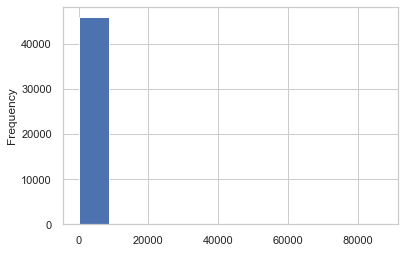

In [7]:
df['backers'].plot(kind='hist');

**Backers histogram  seems not to show a clear distribution, let's try boxplot to see if there is better distribution**

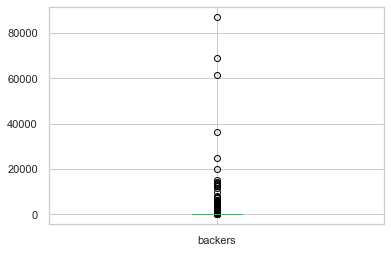

In [8]:
df['backers'].plot(kind='box');

**Boxplot shows that the column backers is highly affected by its outliers, lets try remove them and check the distribution again**

In [9]:
df.shape

(45957, 17)

In [10]:
## remove outliers using interquatile range
# IQR
Q1 = np.percentile(df['backers'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['backers'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = Q3+1.5*IQR
# Lower bound
lower = (Q1-1.5*IQR)
upper
backers_clean = df['backers'][(df['backers'] > lower) & (df['backers'] < upper)]
backers_clean.head()

0     66
1      2
2      3
3    100
4      0
Name: backers, dtype: int64

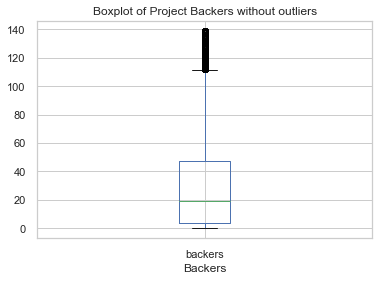

In [11]:
backers_clean.plot(kind='box');
plt.xlabel('Backers')
plt.title('Boxplot of Project Backers without outliers')
plt.show()

**now the data without outliers can show some visible distribution**

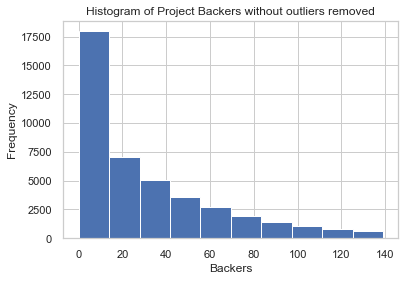

In [12]:
backers_clean.plot(kind='hist');
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Histogram of Project Backers without outliers removed')
plt.show()

**The histogram can now a strong positive right skweness distribution**

### 3) Is the ‘duration’ variable normally distributed?

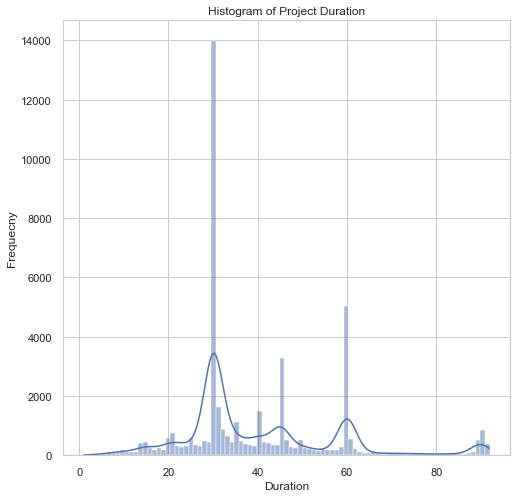

In [13]:
plt.figure(figsize=(8,8))
sns.histplot(df['duration'], kde=True)
#df['duration'].plot(kind='hist')
plt.xlabel('Duration')
plt.ylabel('Frequecny')
plt.title('Histogram of Project Duration')
plt.show()

**Duration distribution looks normally distributed, but there is a slight right skewness, I used both histogram and kde plot to get a clear distribution of duration**

## 4 If you could collect data on another attribute of these projects, what would it be and why?

**Distinct type backers, to get to know contribution of individual backer to each project. Also getting to see distribution of how each backer backed a project would be necessary**

## Part 2
### Qualitative analysis

### What's the best length of time to run a campaign?

In [14]:
df.groupby('status')['duration'].mean()

status
canceled      38.943220
failed        42.977828
live          37.499801
successful    37.960475
suspended     30.000000
Name: duration, dtype: float64

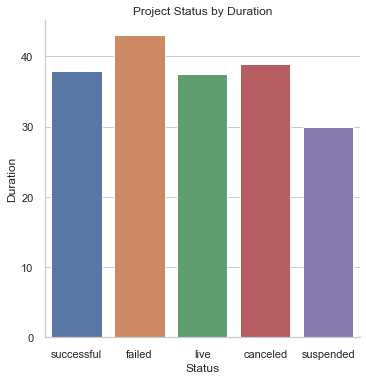

In [15]:
# Plot showing rates of success by duration
sns.catplot(x='status', y='duration', data=df, kind='bar', ci=None)
plt.xlabel('Status')
plt.ylabel('Duration')
plt.title('Project Status by Duration')
plt.show()

**There seems to be no distinct duration to run for a succesful campaign**

### What's the ideal pledge goal?

In [16]:
df.groupby('status')['goal'].mean()

status
canceled      43295.372881
failed        16350.594937
live          27894.687732
successful     5483.827983
suspended     36125.000000
Name: goal, dtype: float64

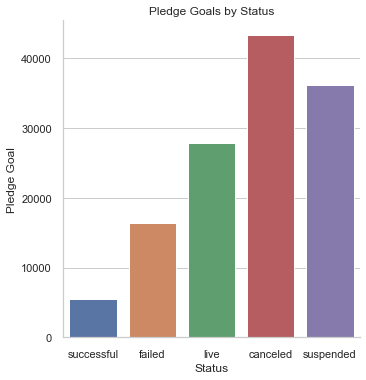

In [17]:
# Plot showing ideal goal with status
sns.catplot(x='status', y='goal', data=df, kind='bar', ci=None)
plt.xlabel('Status')
plt.ylabel('Pledge Goal')
plt.title('Pledge Goals by Status')
plt.show()

**Ideal pledge goal is approximately around _5484_**

### What type of projects would be most successful at getting funded?

In [18]:
status_cat = df.groupby(['status', 'category'])['project id'].count().reset_index(name='counts')
status_cat.head()

,status,category,counts
0,canceled,Design,2
1,canceled,Film & Video,1
2,canceled,Film &amp; Video,22
3,canceled,Food,3
4,canceled,Games,10


**Since we are looking into which projects are successful at funding we will anly analyze successful prjects**
**I Picked only projects which were success to analyze them**

In [19]:
# select succesful projects
# using status succesful will get successful proejcts.
succesful_projects = status_cat[status_cat['status'] == 'successful']
succesful_projects

,status,category,counts
36,successful,Art,2106
37,successful,Comics,520
38,successful,Dance,527
39,successful,Design,729
40,successful,Fashion,335
41,successful,Film & Video,246
42,successful,Film &amp; Video,6177
43,successful,Food,655
44,successful,Games,635
45,successful,Music,6792


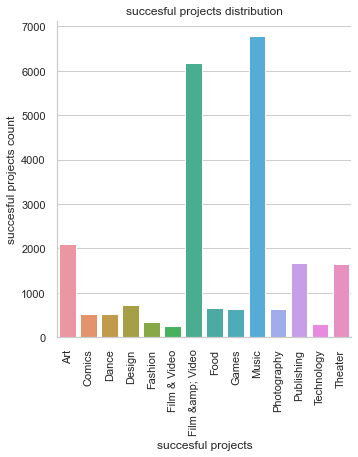

In [20]:
#plot bar of succesful projects
sns.catplot(x='category', y='counts', data=succesful_projects, kind='bar', ci=None)
plt.xlabel('succesful projects')
plt.xticks(rotation=90)
plt.ylabel('succesful projects count')
plt.title('succesful projects distribution')
plt.show()

**From  analysis of most successful projects, music perfomers better followed by Film &amp; Video projects, thus the 2  would be most successful when funded.**

### Is there an ideal month/day/time to launch a campaign?

In [21]:
#convert funded data to datetime index
df['funded_date'] = pd.to_datetime(df['funded date'])

In [22]:
df['funded date'].head()

0    Fri, 19 Aug 2011 19:28:17 -0000
1    Mon, 02 Aug 2010 03:59:00 -0000
2    Fri, 08 Jun 2012 00:00:31 -0000
3    Sun, 08 Apr 2012 02:14:00 -0000
4    Wed, 01 Jun 2011 15:25:39 -0000
Name: funded date, dtype: object

In [23]:
df['funded_month'] = df['funded_date'].dt.month
df['funded_day'] = df['funded_date'].dt.day_name
#df['funded_hour'] = df['funded date'].dt.hour

In [24]:
df['month'] = df['funded date'].str.split(' ', n = 3, expand = True)[2]
df['month'].value_counts()

Jun    6109
May    5721
Apr    5126
Mar    4559
Jul    3564
Dec    3299
Feb    3233
Jan    3105
Aug    3045
Oct    2801
Sep    2755
Nov    2640
Name: month, dtype: int64

In [25]:
df['week_day'] = df['funded date'].str.split(',', n = 1, expand = True)[0]
df['week_day'].value_counts()

Sat    7457
Sun    6997
Fri    6936
Mon    6694
Thu    6503
Wed    5794
Tue    5576
Name: week_day, dtype: int64

In [26]:
## count succes by day
weekday_status = df.groupby(['status', 'week_day'])['project id'].count().reset_index(name='counts')
weekday_status.head()

,status,week_day,counts
0,canceled,Fri,11
1,canceled,Mon,8
2,canceled,Sat,12
3,canceled,Sun,10
4,canceled,Thu,8


In [27]:
#select succesful projects
succesful_day = weekday_status[weekday_status['status'] == 'successful']
succesful_day

,status,week_day,counts
21,successful,Fri,3412
22,successful,Mon,3420
23,successful,Sat,3684
24,successful,Sun,3409
25,successful,Thu,3316
26,successful,Tue,2770
27,successful,Wed,2958


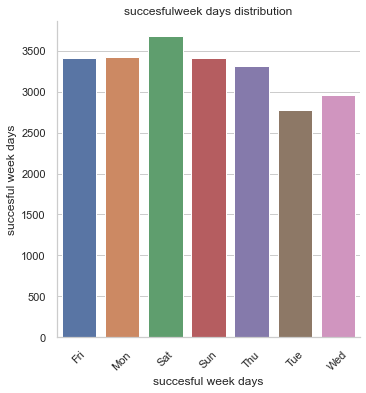

In [28]:
sns.catplot(x='week_day', y='counts', data=succesful_day, kind='bar', ci=None)
plt.xlabel('succesful week days')
plt.xticks(rotation=45)
plt.ylabel('succesful week days')
plt.title('succesfulweek days distribution')
plt.show()

**There is no  much difference in success compared to days, but saturday seems to be perfoming better than other days**

In [29]:
## count succes by day
month_status = df.groupby(['status', 'month'])['project id'].count().reset_index(name='counts')
month_status.head()

,status,month,counts
0,canceled,Jul,5
1,canceled,Jun,41
2,canceled,May,13
3,failed,Apr,2197
4,failed,Aug,1378


In [30]:
#select succesful projects
succesful_months = month_status[month_status['status'] == 'successful']
succesful_months

,status,month,counts
18,successful,Apr,2929
19,successful,Aug,1666
20,successful,Dec,1725
21,successful,Feb,1764
22,successful,Jan,1659
23,successful,Jul,1511
24,successful,Jun,1536
25,successful,Mar,2592
26,successful,May,3044
27,successful,Nov,1517


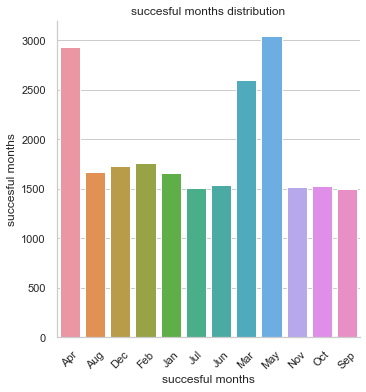

In [31]:
#plt.figure(figsize=(15,8))
sns.catplot(x='month', y='counts', data=succesful_months, kind='bar', ci=None)
plt.xlabel('succesful months')
plt.xticks(rotation=45)
plt.ylabel('succesful months')
plt.title('succesful months distribution')
plt.show()

**may, apr, march seems to be months perfoming better than other months respectively, while other months seems to be approximately equal in perfomance.** 

In [32]:
df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,levels,reward levels,updates,comments,duration,funded_date,funded_month,funded_day,month,week_day
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,2011-08-19 19:28:17+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Fri
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,5,"$1,$5,$10,$25,$50",6,0,47.18,2010-08-02 03:59:00+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Mon
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,...,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,2012-06-08 00:00:31+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Fri
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,...,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,2012-04-08 02:14:00+00:00,4,<bound method PandasDelegate._add_delegate_acc...,Apr,Sun
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,...,6,"$10,$25,$50,$100,$150,$250",2,0,30.00,2011-06-01 15:25:39+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Wed


In [33]:
df['Time'] = pd.to_datetime(df['funded_date']).dt.time

In [34]:
df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,reward levels,updates,comments,duration,funded_date,funded_month,funded_day,month,week_day,Time
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,2011-08-19 19:28:17+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Fri,19:28:17
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,"$1,$5,$10,$25,$50",6,0,47.18,2010-08-02 03:59:00+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Mon,03:59:00
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,...,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,2012-06-08 00:00:31+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Fri,00:00:31
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,...,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,2012-04-08 02:14:00+00:00,4,<bound method PandasDelegate._add_delegate_acc...,Apr,Sun,02:14:00
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,...,"$10,$25,$50,$100,$150,$250",2,0,30.00,2011-06-01 15:25:39+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Wed,15:25:39


In [35]:
df['Time'] = df.Time.apply(lambda x: x.hour)

In [36]:
df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,reward levels,updates,comments,duration,funded_date,funded_month,funded_day,month,week_day,Time
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,2011-08-19 19:28:17+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Fri,19
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,"$1,$5,$10,$25,$50",6,0,47.18,2010-08-02 03:59:00+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Mon,3
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,...,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,2012-06-08 00:00:31+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Fri,0
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,...,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,2012-04-08 02:14:00+00:00,4,<bound method PandasDelegate._add_delegate_acc...,Apr,Sun,2
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,...,"$10,$25,$50,$100,$150,$250",2,0,30.00,2011-06-01 15:25:39+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Wed,15


In [37]:
df.status

0        successful
1            failed
2              live
3        successful
4            failed
            ...    
45952    successful
45953        failed
45954    successful
45955        failed
45956    successful
Name: status, Length: 45957, dtype: object

In [38]:
df_with_time = df.loc[df.status == 'successful', ['Time','status']].append(df.loc[df.status == 'failed',['Time','status']])

In [39]:
df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,reward levels,updates,comments,duration,funded_date,funded_month,funded_day,month,week_day,Time
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,2011-08-19 19:28:17+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Fri,19
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,"$1,$5,$10,$25,$50",6,0,47.18,2010-08-02 03:59:00+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Mon,3
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,...,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,2012-06-08 00:00:31+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Fri,0
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,...,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,2012-04-08 02:14:00+00:00,4,<bound method PandasDelegate._add_delegate_acc...,Apr,Sun,2
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,...,"$10,$25,$50,$100,$150,$250",2,0,30.00,2011-06-01 15:25:39+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Wed,15


In [40]:
df_with_time.head()

,Time,status
0,19,successful
3,2,successful
5,13,successful
7,4,successful
8,4,successful


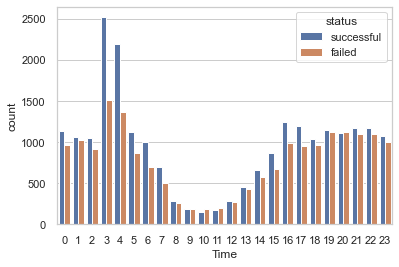

In [47]:
#ax.set(xlabel='Launched Hour', ylabel='Number of Projects', title= 'Hour the Project was Launched')
ax = sns.countplot(x=df_with_time.Time, 
              hue = df_with_time.status)

<AxesSubplot:xlabel='Time', ylabel='count'>

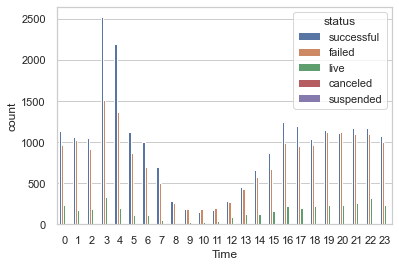

In [48]:
sns.countplot(x=df.Time, 
              hue = df.status)

In [49]:
df.subcategory.unique()

array(['Short Film', 'Board & Card Games', 'Animation', 'Documentary',
       'Fashion', 'Music', 'Illustration', 'Film &amp; Video',
       'Open Software', 'Indie Rock', 'Dance', 'Fiction', 'Nonfiction',
       'Theater', 'Games', 'Art Book', 'Country & Folk', 'Comics',
       'Webseries', 'Technology', 'Performance Art', 'Narrative Film',
       'Video Games', 'Product Design', 'Rock', 'Painting', 'Photography',
       'Conceptual Art', 'Jazz', 'Open Hardware', 'Classical Music',
       'Food', 'Art', 'Pop', 'Journalism', 'Poetry', 'Electronic Music',
       'World Music', 'Sculpture', 'Publishing', "Children's Book",
       'Public Art', 'Mixed Media', 'Graphic Design', 'Hip-Hop',
       'Periodical', 'Crafts', 'Design', 'Digital Art',
       'Board &amp; Card Games', 'Country &amp; Folk'], dtype=object)

In [50]:
status_cat_two = df.groupby(['status', 'subcategory'])['project id'].count().reset_index(name='counts')
status_cat_two.head()

,status,subcategory,counts
0,canceled,Board &amp; Card Games,1
1,canceled,Children's Book,2
2,canceled,Classical Music,1
3,canceled,Country & Folk,1
4,canceled,Documentary,12


In [51]:
succesful_projects_two = status_cat_two[status_cat_two['status'] == 'successful']
succesful_projects_two

,status,subcategory,counts
124,successful,Animation,145
125,successful,Art,610
126,successful,Art Book,158
127,successful,Board & Card Games,49
128,successful,Board &amp; Card Games,212
129,successful,Children's Book,176
130,successful,Classical Music,321
131,successful,Comics,520
132,successful,Conceptual Art,97
133,successful,Country & Folk,166


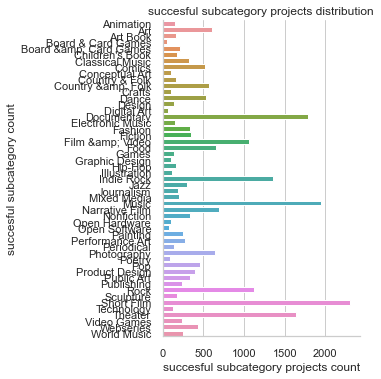

In [52]:
sns.catplot(x='counts', y='subcategory', data=succesful_projects_two, kind='bar', ci=None)
plt.xlabel('succesful subcategory projects count')
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#plt.xticks(rotation=45)
#plt.yticks(rotation=30)
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.ylabel('succesful subcategory count')
plt.title('succesful subcategory projects distribution')
plt.show()

In [53]:
succesful_projects_two_two = succesful_projects_two.drop([124,125,126,127,128,129,131,132,135,136,137,138,139,141,142,143,144,145,146,148,151,152,154,155,156,157,158,159,160,161,162,164,165,166,168,169,170,171,172,173])

In [54]:
succesful_projects_two_two

,status,subcategory,counts
130,successful,Classical Music,321
133,successful,Country & Folk,166
134,successful,Country &amp; Folk,573
140,successful,Electronic Music,152
147,successful,Hip-Hop,160
149,successful,Indie Rock,1358
150,successful,Jazz,299
153,successful,Music,1945
163,successful,Pop,457
167,successful,Rock,1117


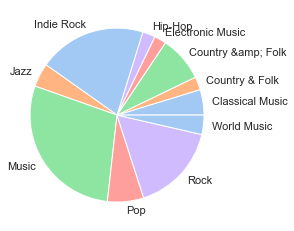

In [55]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(succesful_projects_two_two.counts, labels = succesful_projects_two_two.subcategory,colors = colors)
plt.show()

In [56]:
df.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,reward levels,updates,comments,duration,funded_date,funded_month,funded_day,month,week_day,Time
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,2011-08-19 19:28:17+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Fri,19
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,"$1,$5,$10,$25,$50",6,0,47.18,2010-08-02 03:59:00+00:00,8,<bound method PandasDelegate._add_delegate_acc...,Aug,Mon,3
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,...,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,2012-06-08 00:00:31+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Fri,0
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,...,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,2012-04-08 02:14:00+00:00,4,<bound method PandasDelegate._add_delegate_acc...,Apr,Sun,2
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,...,"$10,$25,$50,$100,$150,$250",2,0,30.00,2011-06-01 15:25:39+00:00,6,<bound method PandasDelegate._add_delegate_acc...,Jun,Wed,15


In [64]:
data_kick = df.loc[df['status'].isin(['successful', 'failed'])]

In [57]:
colors = ('darkgreen','darkred')

C:\Users\isaph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(-0.004, 0.1), (-0.004, 0.1)]

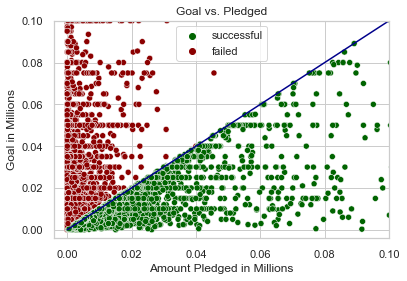

In [115]:
ax = sns.scatterplot(data_kick.pledged/1e6, data_kick.goal/1e6, hue=data_kick.status, palette=colors)
sns.lineplot(x=(0,50), y=(0,50), color='darkblue')
ax.set(ylim=(-1,None), xlim=(-1,None))
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')
ax.set(ylim=(-0.004,0.1), xlim=(-0.004,0.1))

In [113]:
data_kick.groupby('status')['goal'].mean()

status
failed        16350.594937
successful     5483.827983
Name: goal, dtype: float64

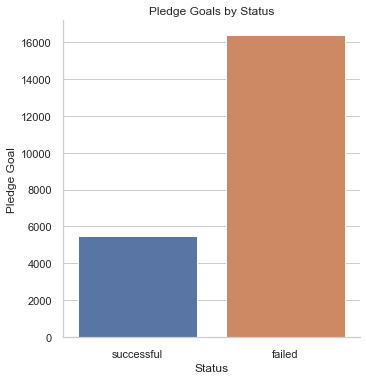

In [114]:
sns.catplot(x='status', y='goal', data=data_kick, kind='bar', ci=None)
plt.xlabel('Status')
plt.ylabel('Pledge Goal')
plt.title('Pledge Goals by Status')
plt.show()

### Evaluation

1. The average pledge goal is approximately around 5,480 setting higher goal than 10,000 might lead to a failure project.

2. Music in general or Indie rock are two of the most successful funded project.

3. Most of the project were funded when launching in May on Saturday.